## Assignment 2

In this assignment, you should start doing EDA and you need to do at least the following:

1. understand the meanings of each feature
2. understand the data types of each feature (when Pandas loads your data, the auto detection of data types may not always be correct)
3. plot features to better understand the basic descriptive statistics, distribution, correlation, etc. 
4. spot potential data issues: missing data, outliers, data errors, etc. 

You should have a Markdown cell on top of the notebook to BRIEFLY summarize the findings/insights from EDA and how EDA helps to guide the following steps (data preprocessing, model building, etc.)

You need to submit a notebook file **AND** the PDF export of the notebook (easier for me to view directly on Canvas) to Canvas - to be clear: I am expecting two files (.ipynb and .pdf).

## Summary
This data set is uploaded in order to get the insights of Credit card Defaultees based on the respective attributes. 
The consumer lending line of business @ JPMC is in the business of lending money to customers for loans, credit cards, mortgage, etc. and a model like this which can predict potential defaults would be immensely helpful in making lending decisions. The aim of the project is to provide this service, based on a ML model, which will be repeatable, scallable and retrainable.

## Data Set
Data set is from Kaggle : https://www.kaggle.com/mishra5001/credit-card

Source:

International Institute of Information Technology Bangalore

The Data was collected as part of Social Experiment to provide public inferences of how a person applying for Loan can get it completed in a minimal amount of time. Also, adhering to the facts as which type of customers fail to repay the installments or full loan and provide inference so that the person applying for loan does not falls into that category.

### Description from Kaggle:
#### Motive!

This data set is uploaded in order to get the insights of Credit card Defaultees based on the respective attributes!

#### Inside?

We have attributes such as IncomeTotal,AMTAPPLICATION,AMT_CREDIT and around 122 Columns in Application Data Set. The interesting thing is if you intend to see the patterns and variations, we can use the PREVIOUS APPLICATION data set also, in order to get more insights.!

#### Inspiration
We took this data set as our assignment and tried to perform the EDA to the best of our capability!

## Solution approach
This is a supervised classification problem since we are using existing features and target variable to first train the model on a subset of data and then evaluate the model's performance on the test data. We would pick the model that best meets the criteria of accuracy and performance. We are trying to predict if a loan request from a customer will default.


## Value to JP Morgan
The consumer lending line of business @ JPMC is in the business of lending money to customers for loans, credit cards, mortgage, etc. and a model like this which can predict potential defaults would be immensely helpful in making lending decisions, Also help JPMC to identify and train their customers for credit discipline.



## Aim of the project
Use the data to come up with a classification model, to approve or reject the application. Eventually build a scalable, repeatable service to give live classification decisions.

## Plan for deliverables
All code and analysis will be checkin in github:
https://github.com/amoghugupte/Slackers-Capstone


In [3]:
import pandas as pd # main focus of this Notebook!
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set()

# df is a common name for a dataframe
df = pd.read_csv('application_data.csv') # read into a pandas DataFrame (df)

# head() is a handy way to visualize what you've loaded. 
df.head() 

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [4]:
df.shape

(307511, 122)

In [6]:
# create a new dataframe with a subset of columns


## The below column list gives 167K odd non null rows, hence keeping this for EDA
cols = ["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "DAYS_LAST_PHONE_CHANGE", "CNT_FAM_MEMBERS", "AMT_ANNUITY", "AMT_GOODS_PRICE", "EXT_SOURCE_2", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "NAME_TYPE_SUITE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", "EXT_SOURCE_3", "OCCUPATION_TYPE"]


#'SK_ID_PREV','AMT_APPLICATION', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE'  - No data
#'EXT_SOURCE_1',  'EXT_SOURCE_2', 'EXT_SOURCE_3', 
#'OCCUPATION_TYPE',
temp1 = df.loc[:,cols].copy() # all rows (:)
temp1.shape

(307511, 73)

In [7]:
temp1.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511,NaN,NaN,NaN,278181,102790,100002,189146,278202,367142,456255
TARGET,307511,NaN,NaN,NaN,0.0807288,0.272419,0,0,0,0,1
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,307511,NaN,NaN,NaN,0.417052,0.722121,0,0,0,1,19
AMT_INCOME_TOTAL,307511,NaN,NaN,NaN,168798,237123,25650,112500,147150,202500,1.17e+08
AMT_CREDIT,307511,NaN,NaN,NaN,599026,402491,45000,270000,513531,808650,4.05e+06
NAME_INCOME_TYPE,307511,8,Working,158774,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
temp1 = temp1.dropna()
temp1.shape

(167732, 73)

In [9]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167732 entries, 0 to 307510
Data columns (total 73 columns):
SK_ID_CURR                     167732 non-null int64
TARGET                         167732 non-null int64
NAME_CONTRACT_TYPE             167732 non-null object
CODE_GENDER                    167732 non-null object
FLAG_OWN_CAR                   167732 non-null object
FLAG_OWN_REALTY                167732 non-null object
CNT_CHILDREN                   167732 non-null int64
AMT_INCOME_TOTAL               167732 non-null float64
AMT_CREDIT                     167732 non-null float64
NAME_INCOME_TYPE               167732 non-null object
NAME_EDUCATION_TYPE            167732 non-null object
NAME_FAMILY_STATUS             167732 non-null object
NAME_HOUSING_TYPE              167732 non-null object
REGION_POPULATION_RELATIVE     167732 non-null float64
DAYS_BIRTH                     167732 non-null int64
DAYS_EMPLOYED                  167732 non-null int64
DAYS_REGISTRATION          

SK_ID_CURR	ID of loan in our sample	
TARGET	Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)	
NAME_CONTRACT_TYPE	Identification if loan is cash or revolving	
CODE_GENDER	Gender of the client	
FLAG_OWN_CAR	Flag if the client owns a car	
FLAG_OWN_REALTY	Flag if client owns a house or flat	
CNT_CHILDREN	Number of children the client has	
AMT_INCOME_TOTAL	Income of the client	
AMT_CREDIT	Credit amount of the loan	
AMT_ANNUITY	Loan annuity	
AMT_GOODS_PRICE	For consumer loans it is the price of the goods for which the loan is given	
NAME_TYPE_SUITE	Who was accompanying client when he was applying for the loan	
NAME_INCOME_TYPE	Clients income type (businessman, working, maternity leave,…)	
NAME_EDUCATION_TYPE	Level of highest education the client achieved	
NAME_FAMILY_STATUS	Family status of the client	
NAME_HOUSING_TYPE	What is the housing situation of the client (renting, living with parents, ...)	
REGION_POPULATION_RELATIVE	Normalized population of region where client lives (higher number means the client lives in more populated region)	normalized 
DAYS_BIRTH	Client's age in days at the time of application	time only relative to the application
DAYS_EMPLOYED	How many days before the application the person started current employment	time only relative to the application
DAYS_REGISTRATION	How many days before the application did client change his registration	time only relative to the application
DAYS_ID_PUBLISH	How many days before the application did client change the identity document with which he applied for the loan	time only relative to the application
OWN_CAR_AGE	Age of client's car	
FLAG_MOBIL	Did client provide mobile phone (1=YES, 0=NO)	
FLAG_EMP_PHONE	Did client provide work phone (1=YES, 0=NO)	
FLAG_WORK_PHONE	Did client provide home phone (1=YES, 0=NO)	
FLAG_CONT_MOBILE	Was mobile phone reachable (1=YES, 0=NO)	
FLAG_PHONE	Did client provide home phone (1=YES, 0=NO)	
FLAG_EMAIL	Did client provide email (1=YES, 0=NO)	
OCCUPATION_TYPE	What kind of occupation does the client have	
CNT_FAM_MEMBERS	How many family members does client have	
REGION_RATING_CLIENT	Our rating of the region where client lives (1,2,3)	
REGION_RATING_CLIENT_W_CITY	Our rating of the region where client lives with taking city into account (1,2,3)	
WEEKDAY_APPR_PROCESS_START	On which day of the week did the client apply for the loan	
HOUR_APPR_PROCESS_START	Approximately at what hour did the client apply for the loan	rounded
REG_REGION_NOT_LIVE_REGION	Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)	
REG_REGION_NOT_WORK_REGION	Flag if client's permanent address does not match work address (1=different, 0=same, at region level)	
LIVE_REGION_NOT_WORK_REGION	Flag if client's contact address does not match work address (1=different, 0=same, at region level)	
REG_CITY_NOT_LIVE_CITY	Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)	
REG_CITY_NOT_WORK_CITY	Flag if client's permanent address does not match work address (1=different, 0=same, at city level)	
LIVE_CITY_NOT_WORK_CITY	Flag if client's contact address does not match work address (1=different, 0=same, at city level)	
ORGANIZATION_TYPE	Type of organization where client works	
EXT_SOURCE_1	Normalized score from external data source	normalized
EXT_SOURCE_2	Normalized score from external data source	normalized
EXT_SOURCE_3	Normalized score from external data source	normalized
APARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
BASEMENTAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
YEARS_BEGINEXPLUATATION_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
YEARS_BUILD_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
COMMONAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
ELEVATORS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
ENTRANCES_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
FLOORSMAX_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
FLOORSMIN_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
LANDAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
LIVINGAPARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
LIVINGAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
NONLIVINGAPARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
NONLIVINGAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
APARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
BASEMENTAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
YEARS_BEGINEXPLUATATION_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
YEARS_BUILD_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
COMMONAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
ELEVATORS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
ENTRANCES_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
FLOORSMAX_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
FLOORSMIN_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
LANDAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
LIVINGAPARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
LIVINGAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
NONLIVINGAPARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
NONLIVINGAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
APARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
BASEMENTAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
YEARS_BEGINEXPLUATATION_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
YEARS_BUILD_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
COMMONAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
ELEVATORS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
ENTRANCES_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
FLOORSMAX_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
FLOORSMIN_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
LANDAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
LIVINGAPARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
LIVINGAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
NONLIVINGAPARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
NONLIVINGAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
FONDKAPREMONT_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
HOUSETYPE_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
TOTALAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
WALLSMATERIAL_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
EMERGENCYSTATE_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor	normalized
OBS_30_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings with observable 30 DPD (days past due) default	
DEF_30_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings defaulted on 30 DPD (days past due) 	
OBS_60_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings with observable 60 DPD (days past due) default	
DEF_60_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings defaulted on 60 (days past due) DPD	
DAYS_LAST_PHONE_CHANGE	How many days before application did client change phone	
FLAG_DOCUMENT_2	Did client provide document 2	
FLAG_DOCUMENT_3	Did client provide document 3	
FLAG_DOCUMENT_4	Did client provide document 4	
FLAG_DOCUMENT_5	Did client provide document 5	
FLAG_DOCUMENT_6	Did client provide document 6	
FLAG_DOCUMENT_7	Did client provide document 7	
FLAG_DOCUMENT_8	Did client provide document 8	
FLAG_DOCUMENT_9	Did client provide document 9	
FLAG_DOCUMENT_10	Did client provide document 10	
FLAG_DOCUMENT_11	Did client provide document 11	
FLAG_DOCUMENT_12	Did client provide document 12	
FLAG_DOCUMENT_13	Did client provide document 13	
FLAG_DOCUMENT_14	Did client provide document 14	
FLAG_DOCUMENT_15	Did client provide document 15	
FLAG_DOCUMENT_16	Did client provide document 16	
FLAG_DOCUMENT_17	Did client provide document 17	
FLAG_DOCUMENT_18	Did client provide document 18	
FLAG_DOCUMENT_19	Did client provide document 19	
FLAG_DOCUMENT_20	Did client provide document 20	
FLAG_DOCUMENT_21	Did client provide document 21	
AMT_REQ_CREDIT_BUREAU_HOUR	Number of enquiries to Credit Bureau about the client one hour before application	
AMT_REQ_CREDIT_BUREAU_DAY	Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)	
AMT_REQ_CREDIT_BUREAU_WEEK	Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)	
AMT_REQ_CREDIT_BUREAU_MON	Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)	
AMT_REQ_CREDIT_BUREAU_QRT	Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)	
AMT_REQ_CREDIT_BUREAU_YEAR	Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)	
SK_ID_PREV 	ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) 	hashed
SK_ID_CURR	ID of loan in our sample	hashed
NAME_CONTRACT_TYPE	Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application	
AMT_ANNUITY	Annuity of previous application	
AMT_APPLICATION	For how much credit did client ask on the previous application	
AMT_CREDIT	Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT	
AMT_DOWN_PAYMENT	Down payment on the previous application	
AMT_GOODS_PRICE	Goods price of good that client asked for (if applicable) on the previous application	
WEEKDAY_APPR_PROCESS_START	On which day of the week did the client apply for previous application	
HOUR_APPR_PROCESS_START	Approximately at what day hour did the client apply for the previous application	rounded
FLAG_LAST_APPL_PER_CONTRACT	Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract	
NFLAG_LAST_APPL_IN_DAY	Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice	
NFLAG_MICRO_CASH	Flag Micro finance loan	
RATE_DOWN_PAYMENT	Down payment rate normalized on previous credit	normalized
RATE_INTEREST_PRIMARY	Interest rate normalized on previous credit	normalized
RATE_INTEREST_PRIVILEGED	Interest rate normalized on previous credit	normalized
NAME_CASH_LOAN_PURPOSE	Purpose of the cash loan	
NAME_CONTRACT_STATUS	Contract status (approved, cancelled, ...) of previous application	
DAYS_DECISION	Relative to current application when was the decision about previous application made	time only relative to the application
NAME_PAYMENT_TYPE	Payment method that client chose to pay for the previous application	
CODE_REJECT_REASON	Why was the previous application rejected	
NAME_TYPE_SUITE	Who accompanied client when applying for the previous application	
NAME_CLIENT_TYPE	Was the client old or new client when applying for the previous application	
NAME_GOODS_CATEGORY	What kind of goods did the client apply for in the previous application	
NAME_PORTFOLIO	Was the previous application for CASH, POS, CAR, …	
NAME_PRODUCT_TYPE	Was the previous application x-sell o walk-in	
CHANNEL_TYPE	Through which channel we acquired the client on the previous application	
SELLERPLACE_AREA	Selling area of seller place of the previous application	
NAME_SELLER_INDUSTRY	The industry of the seller	
CNT_PAYMENT	Term of previous credit at application of the previous application	
NAME_YIELD_GROUP	Grouped interest rate into small medium and high of the previous application	grouped
PRODUCT_COMBINATION	Detailed product combination of the previous application	
DAYS_FIRST_DRAWING	Relative to application date of current application when was the first disbursement of the previous application	time only relative to the application
DAYS_FIRST_DUE	Relative to application date of current application when was the first due supposed to be of the previous application	time only relative to the application
DAYS_LAST_DUE_1ST_VERSION	Relative to application date of current application when was the first due of the previous application	time only relative to the application
DAYS_LAST_DUE	Relative to application date of current application when was the last due date of the previous application	time only relative to the application
DAYS_TERMINATION	Relative to application date of current application when was the expected termination of the previous application	time only relative to the application
NFLAG_INSURED_ON_APPROVAL	Did the client requested insurance during the previous application	


1. Some data for EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, AMT_REQ_CREDIT_BUREAU_QRT missing, we may have to delete these rows and see if we can create the model, worst case we may have to remove these columns and check if the model can be generated.
1. Mean income is 168,798. Max income is 117,000,000
1. Mean credit is 599,026. Max credit is 4,050,000
1. Mean age is 44 years, Min age is 21 years, Max age is 69 years
1. Mean employment tenure is skewed because of few outliers, which we will filter to get a better model.
1. AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before
application)
1. FLAG_OWN_CAR, FLAG_OWN_REALTY valid values are Y and N
1. NAME_INCOME_TYPE valid values are - Bussinessman, Commercial associate, Maternity leave, Pensioner, State servant, Student, unemployed, Working
1. NAME_EDUCATION_TYPE valid values  are - Academic degree, Higher education, Incomplete higher, Lower secondary, Secondary/secondary special
1. NAME_HOUSING_TYPE valid values are - Co-op apartment, House / apartment, Municipal apartment, Office apartment, Rented apartment, With parents
1. REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY  valid values are - 1, 2, 3


In [10]:
temp1.FLAG_OWN_CAR.value_counts()

N    102179
Y     65553
Name: FLAG_OWN_CAR, dtype: int64

In [11]:
temp1.FLAG_OWN_REALTY.value_counts()

Y    113749
N     53983
Name: FLAG_OWN_REALTY, dtype: int64

Working                 106020
Commercial associate     46553
State servant            15144
Student                     10
Businessman                  3
Pensioner                    2
Name: NAME_INCOME_TYPE, dtype: int64


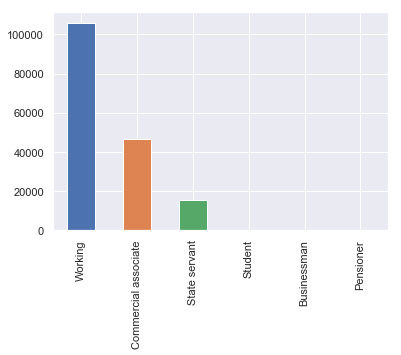

In [12]:
income_type_counts = temp1.NAME_INCOME_TYPE.value_counts()

#income_type_counts.plot(kind='bar')

print (income_type_counts)
income_type_counts.plot(kind='bar')


Secondary / secondary special    115722
Higher education                  44477
Incomplete higher                  6010
Lower secondary                    1433
Academic degree                      90
Name: NAME_EDUCATION_TYPE, dtype: int64


[Text(0.5, 1.0, 'Education Type')]

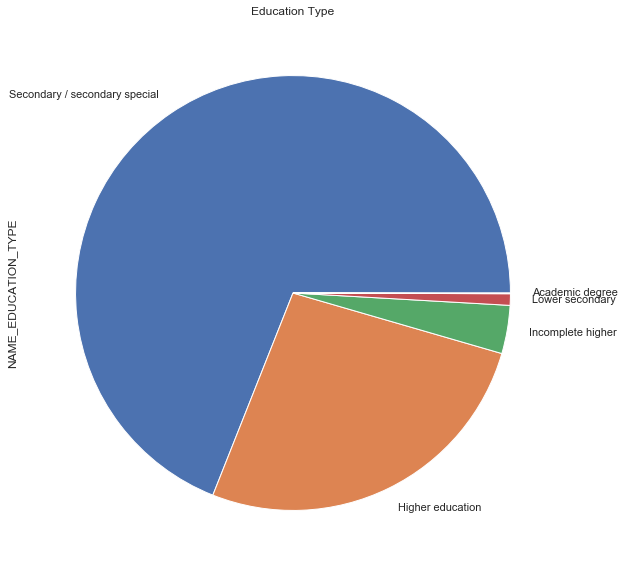

In [13]:
education_type_counts = temp1.NAME_EDUCATION_TYPE.value_counts()
sns.set(rc={'figure.figsize':(15,10)})
print (education_type_counts)

education_type_counts.plot(kind='pie').set(title='Education Type')


House / apartment      147526
With parents             9172
Municipal apartment      5916
Rented apartment         2909
Office apartment         1517
Co-op apartment           692
Name: NAME_HOUSING_TYPE, dtype: int64


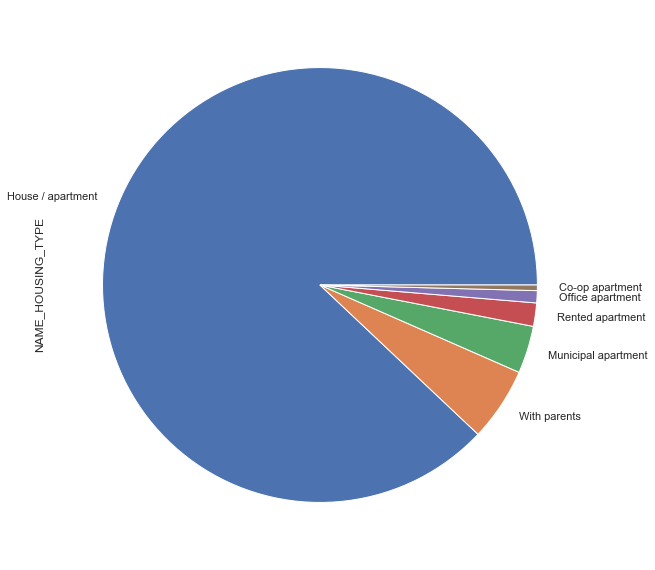

In [14]:
housing_type_count = temp1.NAME_HOUSING_TYPE.value_counts()

print (housing_type_count)
housing_type_count.plot(kind='pie')

In [15]:
temp1.OCCUPATION_TYPE.value_counts()

Laborers                 43437
Sales staff              24254
Core staff               22669
Managers                 17787
Drivers                  14546
High skill tech staff     9264
Accountants               8135
Medicine staff            7223
Security staff            5218
Cooking staff             4633
Cleaning staff            3637
Private service staff     1975
Low-skill Laborers        1443
Secretaries               1047
Waiters/barmen staff      1010
Realty agents              569
HR staff                   460
IT staff                   425
Name: OCCUPATION_TYPE, dtype: int64

In [16]:
temp1.REGION_RATING_CLIENT.value_counts()

2    124938
3     25677
1     17117
Name: REGION_RATING_CLIENT, dtype: int64

In [17]:
temp1.REGION_RATING_CLIENT_W_CITY.value_counts()

2    126049
3     23398
1     18285
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [18]:
temp1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    42113
Self-employed             25892
Other                      9194
Medicine                   8548
Government                 6958
Business Entity Type 2     6893
School                     6316
Trade: type 7              5608
Kindergarten               5327
Construction               4675
Business Entity Type 1     3830
Transport: type 4          3540
Trade: type 3              2584
Industry: type 9           2403
Security                   2397
Industry: type 3           2325
Housing                    2061
Bank                       1867
Police                     1824
Industry: type 11          1773
Military                   1717
Transport: type 2          1678
Postal                     1645
Agriculture                1567
Trade: type 2              1350
Security Ministries        1324
Restaurant                 1230
Services                   1124
Industry: type 7            898
Transport: type 3           854
University                  847
Industry

In [16]:
#sns.pairplot(temp1, height=5);

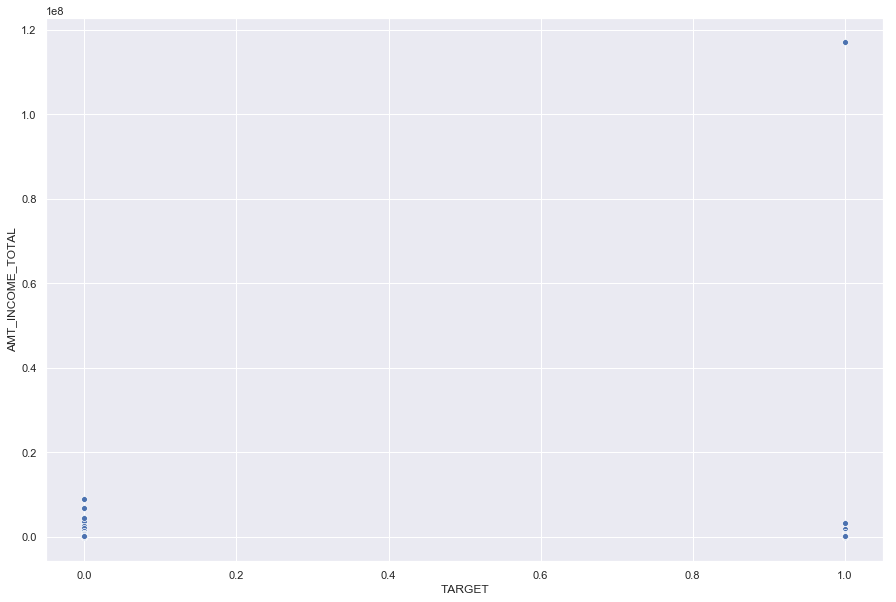

In [19]:
sns.scatterplot(y="AMT_INCOME_TOTAL", x="TARGET", data=temp1)

In [23]:
text_cols = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "NAME_TYPE_SUITE", "OCCUPATION_TYPE"]


for col in text_cols:
    print ("*******************************************************************************************")
    print (col)
    print (temp1[col].value_counts())
    print ("*******************************************************************************************")


*******************************************************************************************
NAME_CONTRACT_TYPE
Cash loans         151480
Revolving loans     16252
Name: NAME_CONTRACT_TYPE, dtype: int64
*******************************************************************************************
*******************************************************************************************
CODE_GENDER
F      103737
M       63993
XNA         2
Name: CODE_GENDER, dtype: int64
*******************************************************************************************
*******************************************************************************************
FLAG_OWN_CAR
N    102179
Y     65553
Name: FLAG_OWN_CAR, dtype: int64
*******************************************************************************************
*******************************************************************************************
FLAG_OWN_REALTY
Y    113749
N     53983
Name: FLAG_OWN_REALTY, dtype: int64
**************

In [24]:
num_features = ["SK_ID_CURR", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "DAYS_LAST_PHONE_CHANGE", "CNT_FAM_MEMBERS", "AMT_ANNUITY", "AMT_GOODS_PRICE", "EXT_SOURCE_2", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", "EXT_SOURCE_3"]
cat_features = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "NAME_TYPE_SUITE", "OCCUPATION_TYPE"]
#"NAME_FAMILY_STATUS", 

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipeline for numerical features
# There are two steps in this pipeline
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is what we discussed before - filling the missing values if any using mean
# Step 2 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),  # we will tune differet strategies later
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: filling the missing values if any using the most frequent value
# Step 2: one hot encoding

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

In [26]:
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

In [27]:
from sklearn.model_selection import GridSearchCV

# set up the values of hyperparameters you want to evaluate
# here you must use the step names as the prefix followed by two under_scores to sepecify the parameter names and the "full path" of the steps

# we are trying 2 different impputer strategies 
# 2x5 different decision tree models with different parameters
# in total we are trying 2x2x5 = 20 different combinations

param_grid_dt = [
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
        'clf_dt__criterion': ['gini', 'entropy'], 
        'clf_dt__max_depth': [3, 4, 5, 6, 7],
    }
]

# set up the grid search 
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy', n_jobs=6, verbose=1)

In [28]:
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:

print(X_train.shape)
print(X_test.shape)

(246008, 121)
(61503, 121)


In [ ]:
# train the model using the full pipeline
grid_search_dt.fit(X_train, y_train)



Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


In [27]:
# check the best performing parameter combination
grid_search_dt.best_params_

{'clf_dt__criterion': 'gini',
 'clf_dt__max_depth': 3,
 'preprocessor__num_pipeline__num_imputer__strategy': 'mean'}

In [28]:
# build-in CV results keys
sorted(grid_search_dt.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_clf_dt__criterion',
 'param_clf_dt__max_depth',
 'param_preprocessor__num_pipeline__num_imputer__strategy',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [29]:
# test score for the 20 decision tree models
grid_search_dt.cv_results_['mean_test_score']

array([0.91920588, 0.91920588, 0.91911645, 0.91911645, 0.91914897,
       0.91914897, 0.91899044, 0.91897011, 0.91887662, 0.91875874,
       0.91920588, 0.91920588, 0.91920588, 0.91920588, 0.9191571 ,
       0.91918962, 0.91902702, 0.91918149, 0.91899857, 0.91893353])

In [30]:
# best decistion tree model test score
grid_search_dt.best_score_

0.9192058796605203

In [31]:
# try SVM classifer
from sklearn.svm import SVC

# SVC pipeline
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_svc', SVC()),
])

# here we are trying three different kernel and three degree values for polynomail kernel
# in total 5 different combinations
param_grid_svc = [
    {
        'clf_svc__kernel': ['linear', 'poly', 'rbf'], 
        'clf_svc__degree': [3, 4, 5],  # only for poly kernel
    }
]

# set up the grid search 
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=10, scoring='accuracy', n_jobs=6, verbose=1)

In [ ]:
import datetime
datetime.datetime.now()
print(datetime.datetime.now())

# train the model using the full pipeline
grid_search_svc.fit(X_train, y_train)

2021-06-17 08:50:45.482967
Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [ ]:
# best test score
grid_search_svc.best_score_

In [ ]:
# try random forest classifer
from sklearn.ensemble import RandomForestClassifier

# rf pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_rf', RandomForestClassifier()),
])

# here we are trying 2x3 different rf models
param_grid_rf = [
    {
        'clf_rf__criterion': ['gini', 'entropy'], 
        'clf_rf__n_estimators': [50, 100, 150],  
    }
]

# set up the grid search 
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=10, scoring='accuracy', n_jobs=6, verbose=1)

In [ ]:

datetime.datetime.now()
print(datetime.datetime.now())

In [ ]:
%%time
# train the model using the full pipeline
grid_search_rf.fit(X_train, y_train)

In [ ]:

datetime.datetime.now()
print(datetime.datetime.now())

In [ ]:
# best test score
print('best dt score is: ', grid_search_dt.best_score_)
print('best svc score is: ', grid_search_svc.best_score_)
print('best rf score is: ', grid_search_rf.best_score_)

In [ ]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_dt.best_estimator_
clf_best

In [ ]:
# final test on the testing set
# To predict on new data: simply calling the predict method 
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(X_test)

# calculate accuracy, precision, recall, f1-score
# Note: y_test is the ground truth for the tesing set
# we have similiar score for the testing set as the cross validation score - good
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

In [ ]:
import datetime
datetime.datetime.now()
print(datetime.datetime.now())